## KNN算法

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [36]:
#KNN算法计算近邻距离，并对待测样本划分类别
def KNN_classifier(k,x_train,y_train,x_new):
    if k<1 or k>x_train.shape[0]:
        print("k值设定有误，请重新指定近邻数！")
        return None
    if x_train.shape[0] != y_train.shape[0]:
        print("样本数据和样本类别标签规模必须一致！请检查输入数据！")
        return None
    if x_train.shape[1] != x_new.shape[0]:
        print("待测数据与训练数据的特征维度不一致！")
        return None
    
    #计算新样本点与所有训练数据集中的样本点的欧式距离
    distances = [np.sqrt(np.sum((x_new - x)**2)) for x in x_train]
    print("distances:" , distances)

    #对距离进行倒序排列，返回的是排序之后的索引位置
    #np.argsort()是将X中的元素从小到大排序后，提取对应的索引index
    nearest = np.argsort(distances)
    print("nearest:" , nearest)

    #获取最近邻的标签类别
    topk_y = [y_train[i] for i in nearest[:k]]
    print("topk_y:" , topk_y)

    #进行投票
    votes = Counter(topk_y)
    print("votes:" , votes)

    '''
    most_common()函数
    —————————————————
    例：votes.most_common(5)  #取前5的结果，也就是说技术最多的前5个
        比如返回值为：[(1,5),(2,3),(4,2),(5,2),(6,1)]
        most_common()函数返回的结果是元组列表，不是字典
    '''
    #返回票数最多的标签值
    return votes.most_common(1)[0][0]

In [13]:
#源数据可视化
def raw_data_visualization(x_train,y_train,x_new):
    plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color = 'g')
    plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color = 'r')
    plt.scatter(x_new[0],x_new[1],color='b',marker='^')

In [24]:
#创建数据集x_train,y_train
raw_data_x = [[4.3935, 2.3313],
              [4.1101, 1.7815],
              [3.3438, 3.3684],
              [3.5823, 4.6792],
              [3.2804, 2.8670],
              [6.3603, 3.0724],

              [8.1305, 2.7432],
              [7.4234, 4.6965],
              [5.7451, 3.5340],
              [9.1722, 2.5111],
              [7.7928, 3.4241],
              [7.9398, 0.7916]]
raw_data_y = [0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1]

In [27]:
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

In [28]:
x_train

array([[4.3935, 2.3313],
       [4.1101, 1.7815],
       [3.3438, 3.3684],
       [3.5823, 4.6792],
       [3.2804, 2.867 ],
       [6.3603, 3.0724],
       [8.1305, 2.7432],
       [7.4234, 4.6965],
       [5.7451, 3.534 ],
       [9.1722, 2.5111],
       [7.7928, 3.4241],
       [7.9398, 0.7916]])

In [29]:
y_train

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [30]:
#创建一个新的数据x_new
x_new = np.array([6.8936,3.2657])

In [37]:
y_new = KNN_classifier(k=3,x_train=x_train,y_train=y_train,x_new=x_new)

distances: [2.669007937417946, 3.1544764842997326, 3.5512853067586674, 3.600373583393812, 3.635130799572417, 0.5672510731589677, 1.3427314921457671, 1.525738077128575, 1.1794223755720428, 2.400299797941915, 0.9130450153196168, 2.6862064794054827]
nearest: [ 5 10  8  6  7  9  0 11  1  2  3  4]
topk_y: [0, 1, 1]
votes: Counter({1: 2, 0: 1})


In [38]:
#待测样本所属类别
y_new

1

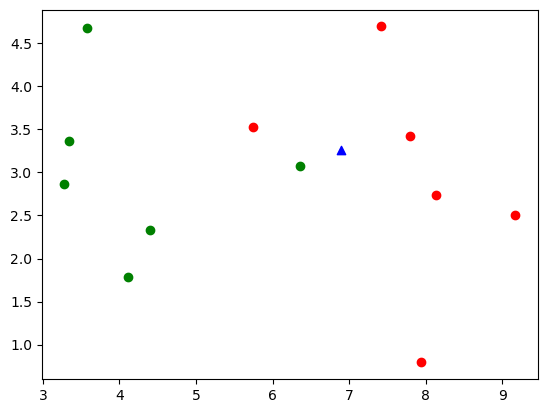

In [39]:
#数据探查，使用matplot将其可视化
raw_data_visualization(x_train=x_train,y_train=y_train,x_new=x_new)

## K最近邻算法实战——手写字体识别

In [40]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#获得手写字体数据集
digits = datasets.load_digits()

In [45]:
#将手写字体数据集赋值给X
#注意这里赋值的是“data”而不是“images”，“data”已经将图片处理成数字
X=digits.data

In [46]:
#将目标变量赋值给Y
Y=digits.target

In [57]:
#分割数据集
#分别抽样选出训练集和测试集，这里我们将测试集的比重设置为20%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [74]:
#新建分类器模型
#k值选择3
KNN_classifier = KNeighborsClassifier(n_neighbors=3)

In [75]:
#将模型应用到训练集上
KNN_classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
KNN_classifier.score(X_test,Y_test)

d:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9888888888888889